In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [2]:
# Loading Dataset
df=pd.read_csv('Literacy_Rate.csv')
df.head()

,Country Name,Country Code,Year,"Literacy rate, adult female (% of females ages 15 and above)","Literacy rate, adult male (% of males ages 15 and above)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth (ages 15-24), gender parity index (GPI)","Literacy rate, youth female (% of females ages 15-24)","Literacy rate, youth male (% of males ages 15-24)","Literacy rate, youth total (% of people ages 15-24)"
0,Africa Eastern and Southern,AFE,1994,50.344711,68.917778,59.345901,0.87381,65.629692,75.107361,70.389648
1,Africa Eastern and Southern,AFE,2004,56.508419,73.368347,64.676750,0.88442,69.211143,78.256264,73.721352
2,Africa Eastern and Southern,AFE,2014,63.500740,76.908257,70.035309,0.94314,77.921753,82.619919,80.261879
3,Africa Western and Central,AFW,1994,35.778011,58.103001,46.830090,0.76394,52.632961,68.896599,60.813660
4,Africa Western and Central,AFW,2004,40.108150,62.925961,51.427860,0.77252,54.969398,71.155731,63.129848


In [3]:
#cleaning
df.isnull().sum()

,0
Country Name,0
Country Code,0
Year,0
"Literacy rate, adult female (% of females ages 15 and above)",24
"Literacy rate, adult male (% of males ages 15 and above)",25
"Literacy rate, adult total (% of people ages 15 and above)",24
"Literacy rate, youth (ages 15-24), gender parity index (GPI)",9
"Literacy rate, youth female (% of females ages 15-24)",2
"Literacy rate, youth male (% of males ages 15-24)",9
"Literacy rate, youth total (% of people ages 15-24)",9


In [4]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Country Name,0
Country Code,0
Year,0
"Literacy rate, adult female (% of females ages 15 and above)",0
"Literacy rate, adult male (% of males ages 15 and above)",0
"Literacy rate, adult total (% of people ages 15 and above)",0
"Literacy rate, youth (ages 15-24), gender parity index (GPI)",0
"Literacy rate, youth female (% of females ages 15-24)",0
"Literacy rate, youth male (% of males ages 15-24)",0
"Literacy rate, youth total (% of people ages 15-24)",0


In [5]:
numeric_cols = df.select_dtypes(include=['float', 'int']).columns

# Round numeric columns to exactly 2 decimals
df[numeric_cols] = df[numeric_cols].apply(lambda x: round(x, 2))
df

,Country Name,Country Code,Year,"Literacy rate, adult female (% of females ages 15 and above)","Literacy rate, adult male (% of males ages 15 and above)","Literacy rate, adult total (% of people ages 15 and above)","Literacy rate, youth (ages 15-24), gender parity index (GPI)","Literacy rate, youth female (% of females ages 15-24)","Literacy rate, youth male (% of males ages 15-24)","Literacy rate, youth total (% of people ages 15-24)"
0,Africa Eastern and Southern,AFE,1994,50.34,68.92,59.35,0.87,65.63,75.11,70.39
1,Africa Eastern and Southern,AFE,2004,56.51,73.37,64.68,0.88,69.21,78.26,73.72
2,Africa Eastern and Southern,AFE,2014,63.50,76.91,70.04,0.94,77.92,82.62,80.26
3,Africa Western and Central,AFW,1994,35.78,58.10,46.83,0.76,52.63,68.90,60.81
4,Africa Western and Central,AFW,2004,40.11,62.93,51.43,0.77,54.97,71.16,63.13
...,...,...,...,...,...,...,...,...,...,...
214,World,WLD,2004,77.42,87.52,82.45,0.94,85.37,91.00,88.25
215,World,WLD,2014,81.41,89.19,85.29,0.96,89.11,92.55,90.88
216,"Yemen, Rep.",YEM,1994,17.00,57.00,37.00,0.00,35.00,83.00,60.00
217,"Yemen, Rep.",YEM,2004,35.00,73.16,54.10,0.65,60.60,92.85,77.00


In [6]:

df_2004 = df[df["Year"] == 2004]
fig = px.choropleth(
    df_2004,
    locations="Country Name",
    locationmode='country names',
    color="Literacy rate, adult total (% of people ages 15 and above)",
    hover_name="Country Name",
    hover_data={
        "Literacy rate, adult male (% of males ages 15 and above)": ':.2f',
        "Literacy rate, adult female (% of females ages 15 and above)": ':.2f'
    },
    title='Global Adult Literacy Rates - 2004',
    color_continuous_scale='Viridis'
)

fig.update_layout(
    geo=dict(showframe=False, projection_type='natural earth'),
    title_x=0.5
)

fig.show()



In [7]:
!pip install pycountry-convert
import pycountry_convert as pc

def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        continent_name = pc.convert_continent_code_to_continent_name(continent_code)
        return continent_name
    except:
        return None

df["Continent"] = df["Country Name"].apply(get_continent)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.6/250.6 kB 17.4 MB/s eta 0:00:00


In [8]:
import pandas as pd
import plotly.express as px

# Filter for Africa and drop missing youth literacy values
df_africa_youth = df[df["Continent"] == "Africa"].dropna(
    subset=["Literacy rate, youth total (% of people ages 15-24)"]
)

# Create Bubble Map for Youth Literacy
fig = px.scatter_geo(df_africa_youth,
    locations="Country Name",
    locationmode="country names",
    size="Literacy rate, youth total (% of people ages 15-24)",
    color="Literacy rate, youth total (% of people ages 15-24)",
    hover_name="Country Name",
    hover_data={
        "Year": True,
        "Literacy rate, youth total (% of people ages 15-24)": ':.2f'
    },
    title=" Youth Literacy Rates in Africa (Bubble Map)",
    size_max=11,
    color_continuous_scale="Plasma"
)

fig.update_layout(
    geo=dict(scope='africa', projection_type='natural earth'),
    title_x=0.5
)

fig.show()


In [9]:
# Create a new column for Combined Literacy Rate (Adult + Youth)
df["Combined Literacy Rate"] = df[[
    "Literacy rate, adult total (% of people ages 15 and above)",
    "Literacy rate, youth total (% of people ages 15-24)"
]].mean(axis=1)


In [10]:
import pandas as pd
import plotly.express as px

fig = px.histogram(df,
                   x="Combined Literacy Rate",
                   nbins=20,
                   labels={"Combined Literacy Rate": "Literacy Rate (%)"},
                   color_discrete_sequence=["#1f77b4"])

fig.update_layout(
    title_x=0.5,
    bargap=0.1,
    yaxis_title="Number of Countries",
    title="Distribution of Combined Literacy Rates"
)

fig.show()




/tmp/ipython-input-2195544243.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




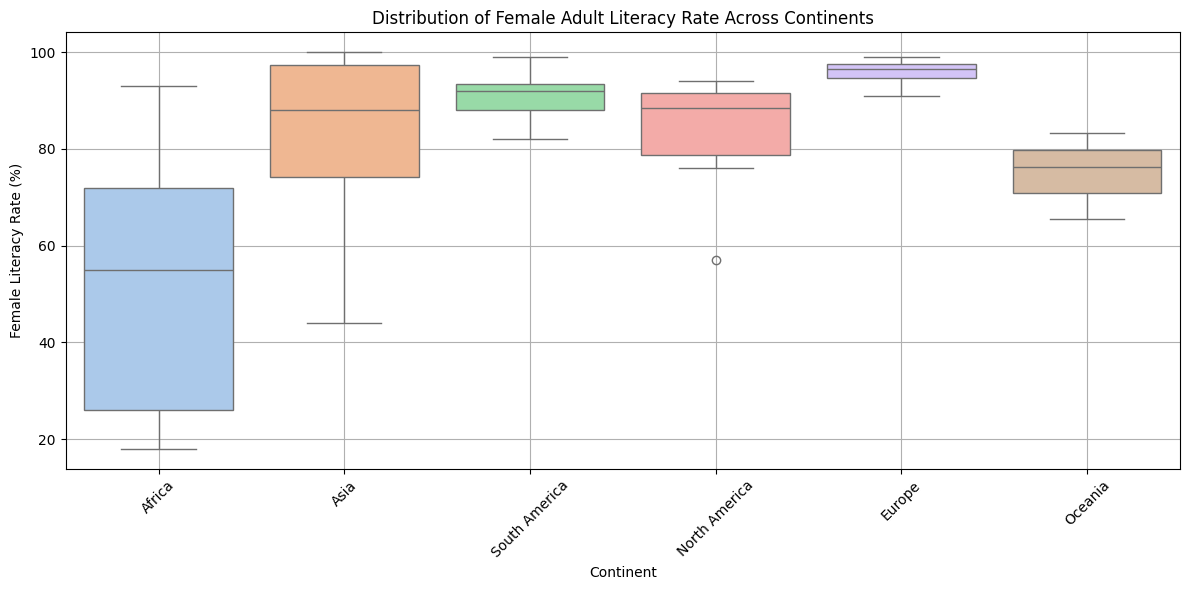

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x="Continent",
            y="Literacy rate, adult female (% of females ages 15 and above)",
            data=df,
            palette="pastel")

plt.title("Distribution of Female Adult Literacy Rate Across Continents")
plt.xlabel("Continent")
plt.ylabel("Female Literacy Rate (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import plotly.express as px

df.columns = df.columns.str.strip()
df_filtered = df[df["Year"] == 2014]
box_df = df_filtered.melt(
    id_vars=["Country Name", "Continent"],
    value_vars=[
        "Literacy rate, adult male (% of males ages 15 and above)",
        "Literacy rate, adult female (% of females ages 15 and above)"
    ],
    var_name="Gender",
    value_name="Literacy Rate"
).dropna()
box_df["Gender"] = box_df["Gender"].str.extract(r"adult (\w+)")
fig = px.box(
    box_df,
    x="Gender",
    y="Literacy Rate",
    color="Gender",
    points="all",
    title="Distribution of Adult Literacy Rates by Gender (2014)"
)

fig.update_layout(title_x=0.5)
fig.show()


In [13]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("Literacy_Rate.csv")

# Select and rename relevant columns
df = df[[
    "Country Name", "Year",
    "Literacy rate, adult female (% of females ages 15 and above)",
    "Literacy rate, adult male (% of males ages 15 and above)",
    "Literacy rate, youth female (% of females ages 15-24)",
    "Literacy rate, youth male (% of males ages 15-24)"
]]
df.columns = [
    "Country", "Year",
    "Adult Female", "Adult Male", "Youth Female", "Youth Male"
]

# Melt the dataframe to long format
df_melted = df.melt(
    id_vars=["Country", "Year"],
    value_vars=["Adult Female", "Adult Male", "Youth Female", "Youth Male"],
    var_name="Group",
    value_name="Literacy Rate"
)

# Drop missing values
df_melted = df_melted.dropna(subset=["Literacy Rate"])

# Filter for the latest year
latest_year = df_melted["Year"].max()
df_latest = df_melted[df_melted["Year"] == latest_year]

# Use Treemap without aggregation
# Add a small dummy column for sizing (equal for all, just for visual)
df_latest["Size"] = 1

# Create the treemap
fig = px.treemap(
    df_latest,
    path=["Country", "Group"],
    values="Size",  # uniform size so it's not summed literacy rate
    color="Literacy Rate",  # actual literacy rate used for color
    color_continuous_scale="YlGnBu",
    title=f"Literacy Rate by Country and Gender Group (Year: {latest_year})",
    hover_data={"Literacy Rate": True, "Size": False}
)

fig.show()


/tmp/ipython-input-3388233763.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [14]:
import plotly.graph_objects as go
import pandas as pd
import pycountry_convert as pc

# Function to get continent from country name
def get_continent(country_name):
    try:
        country_code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(country_code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return None

# Load your dataset
df = pd.read_csv("Literacy_Rate.csv")

# Apply the function to add a 'Continent' column
df["Continent"] = df["Country Name"].apply(get_continent)

# Define the metrics to plot
metrics = {
    "Adult Total": "Literacy rate, adult total (% of people ages 15 and above)",
    "Youth Total": "Literacy rate, youth total (% of people ages 15-24)",
}

# Initialize the figure
fig = go.Figure()
buttons = []

# Iterate over the metrics to add traces for each
for i, (label, col) in enumerate(metrics.items()):
    df_filtered = df.dropna(subset=["Continent", col])
    grouped = df_filtered.groupby(["Year", "Continent"])[col].mean().reset_index()

    for continent in grouped["Continent"].unique():
        cont_data = grouped[grouped["Continent"] == continent]
        visible = (i == 0)
        fig.add_trace(go.Scatter(
            x=cont_data["Year"],
            y=cont_data[col],
            mode='lines+markers',
            name=continent,
            visible=visible,
            legendgroup=continent,
            hovertemplate=f"{continent}<br>Year=%{{x}}<br>{label}=%{{y:.2f}}"
        ))

    # Define buttons for each metric
    buttons.append(dict(
        label=label,
        method="update",
        args=[{
            "visible": [j // len(grouped["Continent"].unique()) == i for j in range(len(metrics) * len(grouped["Continent"].unique()))]
        },
        {
            "title": f"{label} Trends by Continent",
            "yaxis": {"title": f"{label} (%)"}
        }]
    ))

# Update the layout of the figure with the buttons for interactivity
fig.update_layout(
    updatemenus=[dict(
        buttons=buttons,
        direction="down",
        showactive=True,
        x=0.5,
        xanchor="center",
        y=1.15,
        yanchor="top"
    )],
    title="Literacy Rate Trends by Continent",
    title_x=0.5,
    xaxis=dict(title="Year", rangeslider=dict(visible=True), tickmode='linear'),
    yaxis=dict(title="Literacy Rate (%)")
)

# Show the plot
fig.show()


In [15]:
!pip install dash dash-bootstrap-components pycountry pycountry-convert plotly

import pandas as pd
import dash
from dash import dcc, html, Input, Output
import plotly.express as px
import pycountry_convert as pc

# Load dataset
df = pd.read_csv("Literacy_Rate.csv")

# Rename columns for simplicity
df.rename(columns={
    "Literacy rate, adult female (% of females ages 15 and above)": "Adult Female",
    "Literacy rate, adult male (% of males ages 15 and above)": "Adult Male",
    "Literacy rate, adult total (% of people ages 15 and above)": "Adult Total",
    "Literacy rate, youth female (% of females ages 15-24)": "Youth Female",
    "Literacy rate, youth male (% of males ages 15-24)": "Youth Male",
    "Literacy rate, youth total (% of people ages 15-24)": "Youth Total"
}, inplace=True)

# Add Continent
def get_continent(country):
    try:
        code = pc.country_name_to_country_alpha2(country)
        cont_code = pc.country_alpha2_to_continent_code(code)
        return pc.convert_continent_code_to_continent_name(cont_code)
    except:
        return None

# Filter non-country rows
non_country = df["Country Name"].str.contains("income|region|World|states|countries|dividend", case=False, na=False)
df = df[~non_country].copy()

# Map continent
df["Continent"] = df["Country Name"].apply(get_continent)

# Melt into long format
df_melted = df.melt(
    id_vars=["Country Name", "Year", "Continent"],
    value_vars=["Adult Female", "Adult Male", "Adult Total", "Youth Female", "Youth Male", "Youth Total"],
    var_name="Literacy Type",
    value_name="Literacy Rate"
).dropna()

# Dash app
app = dash.Dash(__name__)
app.title = "Interactive Literacy Treemap"

# Layout
app.layout = html.Div(style={"backgroundColor": "#2c2c2c", "padding": "20px"}, children=[
    html.H2("📊 Interactive Literacy Treemap", style={"textAlign": "center", "color": "white"}),

    html.Div([
        html.Label("Select Literacy Type", style={"color": "white"}),
        dcc.Dropdown(
            id="type-dropdown",
            options=[{"label": t, "value": t} for t in df_melted["Literacy Type"].unique()],
            value="Adult Female"
        )
    ], style={"width": "40%", "display": "inline-block", "margin": "0 1%"}),

    html.Div([
        html.Label("Select Year", style={"color": "white"}),
        dcc.Dropdown(
            id="year-dropdown",
            options=[{"label": y, "value": y} for y in sorted(df_melted["Year"].unique())],
            value=2014
        )
    ], style={"width": "20%", "display": "inline-block"}),

    dcc.Graph(id="treemap-graph", style={"marginTop": "30px"})
])

# Callback
@app.callback(
    Output("treemap-graph", "figure"),
    [Input("type-dropdown", "value"),
     Input("year-dropdown", "value")]
)
def update_treemap(selected_type, selected_year):
    filtered = df_melted[
        (df_melted["Literacy Type"] == selected_type) &
        (df_melted["Year"] == selected_year)
    ]

    fig = px.treemap(
        filtered,
        path=["Continent", "Country Name"],
        values="Literacy Rate",
        color="Literacy Rate",
        color_continuous_scale="Plasma",
        title=f"Literacy rate, {selected_type.lower()} in {selected_year}"
    )
    fig.update_layout(title_x=0.5)
    return fig

# Run
if __name__ == '__main__':
    app.run(debug=False)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.0/204.0 kB 15.7 MB/s eta 0:00:00


<IPython.core.display.Javascript object>